# TOC

__Chapter 3 - Feature improvement - cleaning datasets__

1. [Import](#Import)
1. [Exploratory data analysis](#Exploratory-data-analysis)
    1. [Univariate & feature vs. target](Univariate-&-feature-vs.-target)
    1. [Correlation](#Correlation)
    1. [Missing data](#Missing-data)
        1. [Remove missing data](#Remove-missing-data)
        1. [Impute missing data](#Impute-missing-data)        
    1. [Pipelines - imputing and feature scaling ](#Pipelines-imputing-and-feature-scaling)


# Import

<a id = 'Import'></a>

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
from io import StringIO
import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:,.6f}".format

# modeling extensions
import sklearn.base as base
import sklearn.cluster as cluster
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.ensemble as ensemble
import sklearn.feature_extraction as feature_extraction
import sklearn.feature_selection as feature_selection
import sklearn.impute as impute
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.neighbors as neighbors
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preprocessing
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.discriminant_analysis as discriminant_analysis
import sklearn.utils as utils

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# custom extensions and settings
sys.path.append("/home/mlmachine") if "/home/mlmachine" not in sys.path else None
sys.path.append("/home/prettierplot") if "/home/prettierplot" not in sys.path else None

import mlmachine as mlm
from prettierplot.plotter import PrettierPlot
import prettierplot.style as style

# magic functions
%matplotlib inline

In [2]:
# load data and inspect
pima_column_names = [
    "times_pregnant",
    "plasma_glucose_concentration",
    "diastolic_blood_pressure",
    "triceps_thickness",
    "serum_insulin",
    "bmi",
    "pedigree_function",
    "age",
    "onset_diabetes",
]

df = pd.read_csv("s3://tdp-ml-datasets/misc/PimaIndians.csv", sep="|", names=pima_column_names)
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregnant                  768 non-null int64
plasma_glucose_concentration    768 non-null int64
diastolic_blood_pressure        768 non-null int64
triceps_thickness               768 non-null int64
serum_insulin                   768 non-null int64
bmi                             768 non-null float64
pedigree_function               768 non-null float64
age                             768 non-null int64
onset_diabetes                  768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


In [3]:
# null accuracy
df["onset_diabetes"].value_counts(normalize=True)

0   0.651042
1   0.348958
Name: onset_diabetes, dtype: float64

# Exploratory data analysis

<a id = 'Exploratory-data-analysis'></a>

## Univariate & feature vs. target

<a id = 'Univariate-&-feature-vs.-target'></a>

******************
object label encoding

0 --> 0
1 --> 1


Univariate stats Bivariate stats Statistical test 
 
 
 
 times_pregnant 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 3.845052 
 
 
 std 
 3.369578 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 3.000000 
 
 
 75% 
 6.000000 
 
 
 max 
 17.000000 
 
 
 skew 
 0.899910 
 
 
 kurtosis 
 0.150383 
 
 
 
 
 
 times_pregnant 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 3.298000 
 3.014166 
 
 
 1.000000 
 268.000000 
 34.895833 
 4.865672 
 3.734253 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 6.298400 
 0.000000

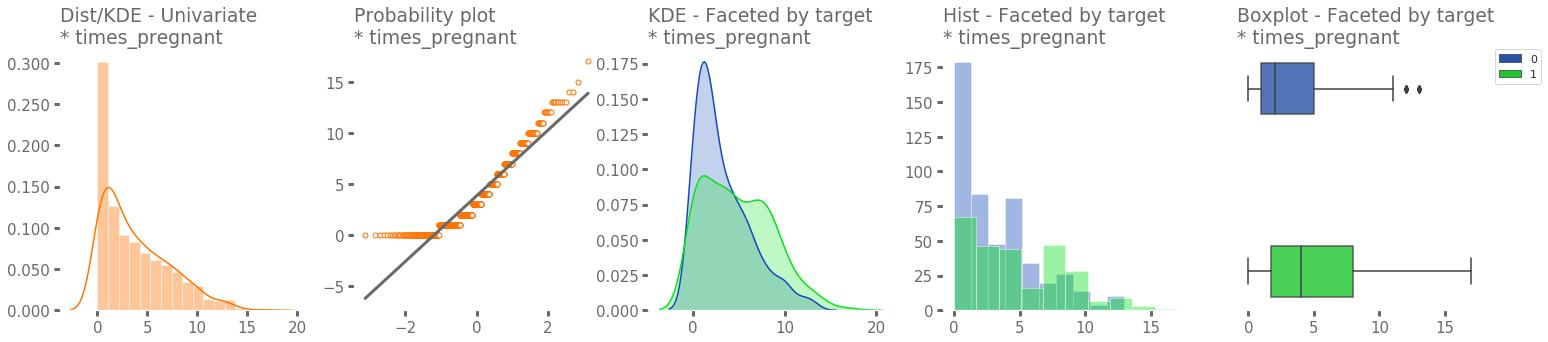

Univariate stats Bivariate stats Statistical test 
 
 
 
 plasma_glucose_concentration 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 120.894531 
 
 
 std 
 31.972618 
 
 
 min 
 0.000000 
 
 
 25% 
 99.000000 
 
 
 50% 
 117.000000 
 
 
 75% 
 140.250000 
 
 
 max 
 199.000000 
 
 
 skew 
 0.173410 
 
 
 kurtosis 
 0.628813 
 
 
 
 
 
 plasma_glucose_concentration 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 109.980000 
 26.115045 
 
 
 1.000000 
 268.000000 
 34.895833 
 141.257463 
 31.879978 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 14.600100 
 0.000000

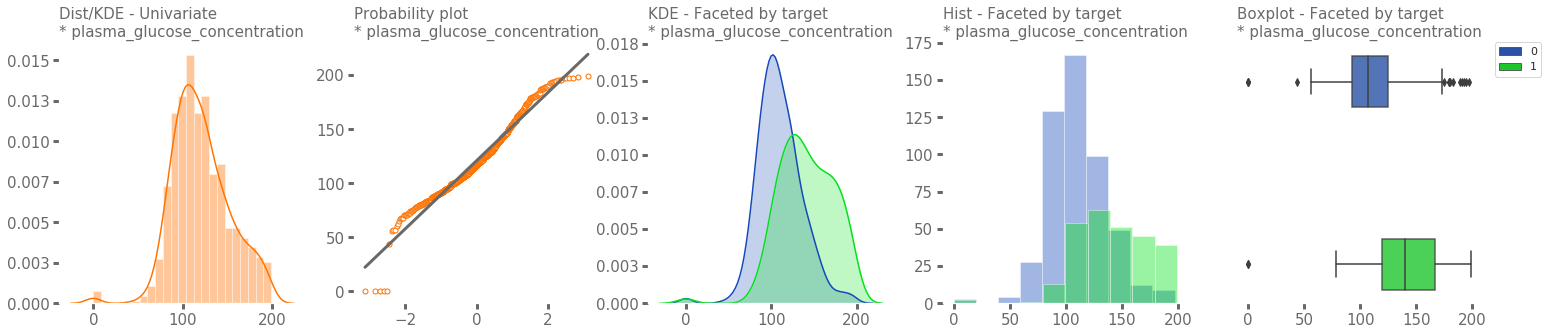

Univariate stats Bivariate stats Statistical test 
 
 
 
 diastolic_blood_pressure 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 69.105469 
 
 
 std 
 19.355807 
 
 
 min 
 0.000000 
 
 
 25% 
 62.000000 
 
 
 50% 
 72.000000 
 
 
 75% 
 80.000000 
 
 
 max 
 122.000000 
 
 
 skew 
 -1.840010 
 
 
 kurtosis 
 5.138691 
 
 
 
 
 
 diastolic_blood_pressure 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 68.184000 
 18.045003 
 
 
 1.000000 
 268.000000 
 34.895833 
 70.824627 
 21.451678 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 1.804700 
 0.071100

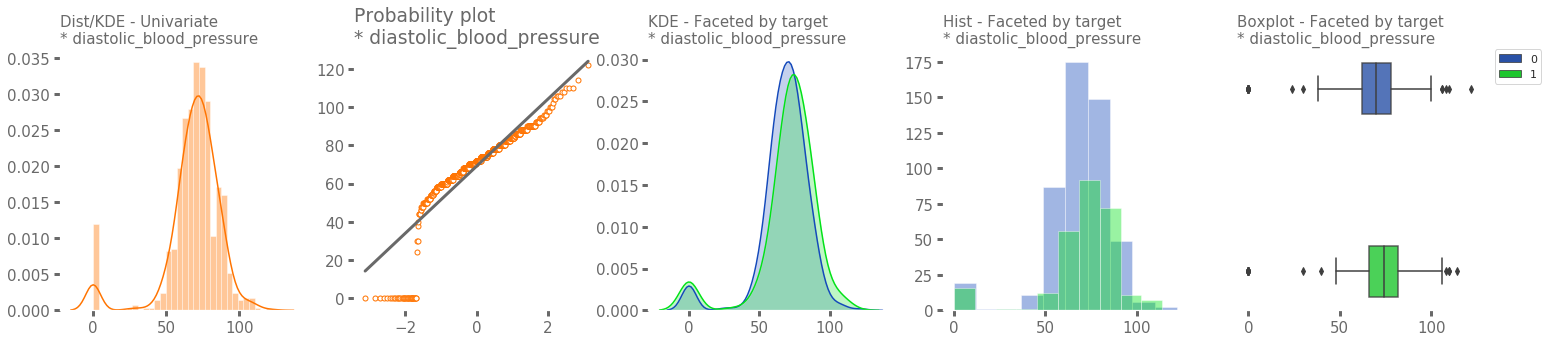

Univariate stats Bivariate stats Statistical test 
 
 
 
 triceps_thickness 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 20.536458 
 
 
 std 
 15.952218 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 23.000000 
 
 
 75% 
 32.000000 
 
 
 max 
 99.000000 
 
 
 skew 
 0.109160 
 
 
 kurtosis 
 -0.524494 
 
 
 
 
 
 triceps_thickness 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 19.664000 
 14.875050 
 
 
 1.000000 
 268.000000 
 34.895833 
 22.164179 
 17.646696 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 2.074700 
 0.038000

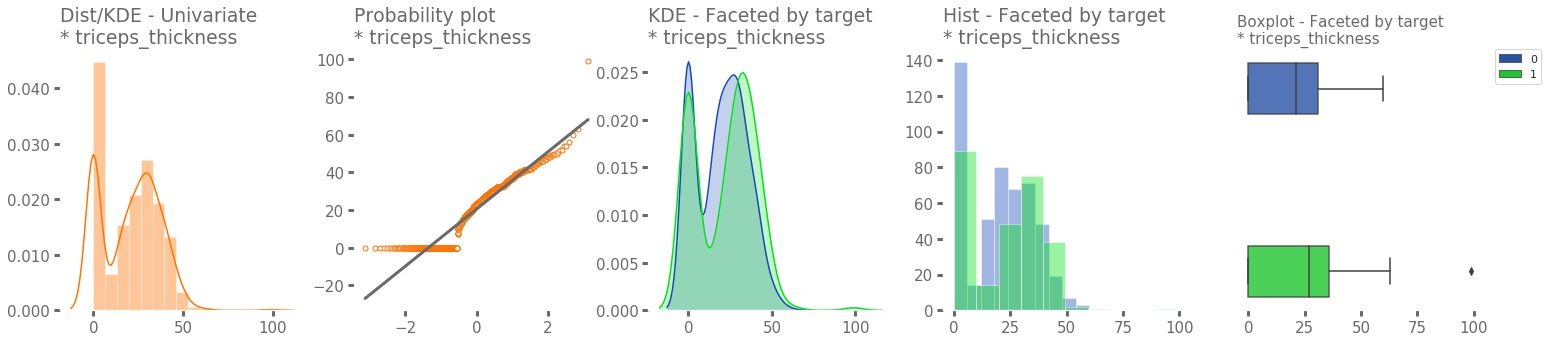

Univariate stats Bivariate stats Statistical test 
 
 
 
 serum_insulin 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 79.799479 
 
 
 std 
 115.244002 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 30.500000 
 
 
 75% 
 127.250000 
 
 
 max 
 846.000000 
 
 
 skew 
 2.267810 
 
 
 kurtosis 
 7.159575 
 
 
 
 
 
 serum_insulin 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 68.792000 
 98.766375 
 
 
 1.000000 
 268.000000 
 34.895833 
 100.335821 
 138.430135 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 3.644300 
 0.000300

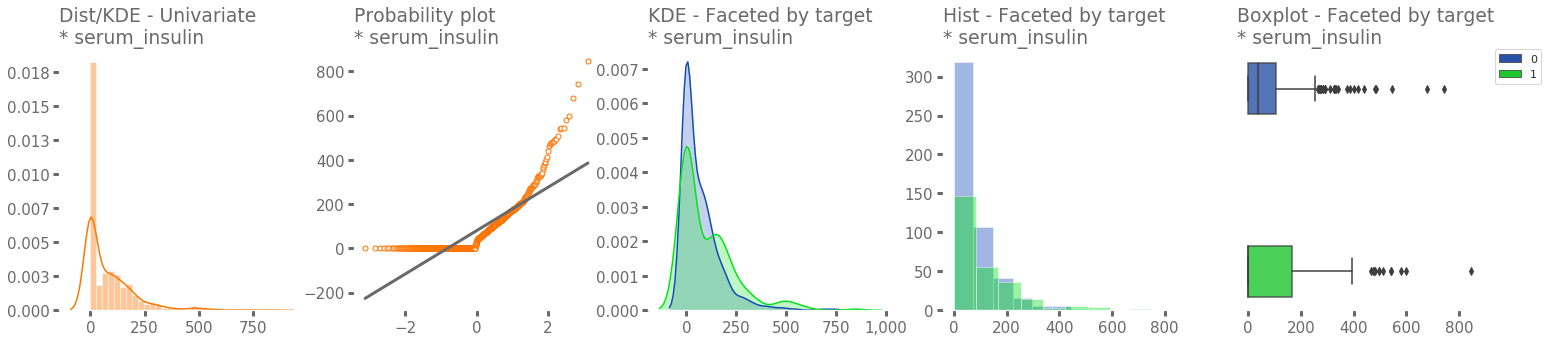

Univariate stats Bivariate stats Statistical test 
 
 
 
 bmi 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 31.992578 
 
 
 std 
 7.884160 
 
 
 min 
 0.000000 
 
 
 25% 
 27.300000 
 
 
 50% 
 32.000000 
 
 
 75% 
 36.600000 
 
 
 max 
 67.100000 
 
 
 skew 
 -0.428140 
 
 
 kurtosis 
 3.261257 
 
 
 
 
 
 bmi 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 30.304200 
 7.682161 
 
 
 1.000000 
 268.000000 
 34.895833 
 35.142537 
 7.249404 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 8.471800 
 0.000000

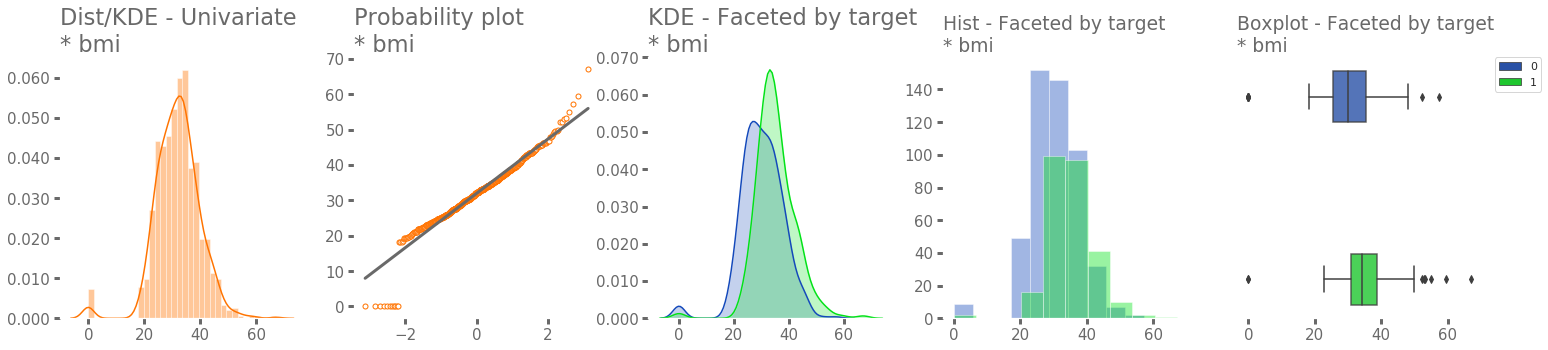

Univariate stats Bivariate stats Statistical test 
 
 
 
 pedigree_function 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 0.471876 
 
 
 std 
 0.331329 
 
 
 min 
 0.078000 
 
 
 25% 
 0.243750 
 
 
 50% 
 0.372500 
 
 
 75% 
 0.626250 
 
 
 max 
 2.420000 
 
 
 skew 
 1.916160 
 
 
 kurtosis 
 5.550792 
 
 
 
 
 
 pedigree_function 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 0.429734 
 0.298786 
 
 
 1.000000 
 268.000000 
 34.895833 
 0.550500 
 0.371659 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 4.885800 
 0.000000

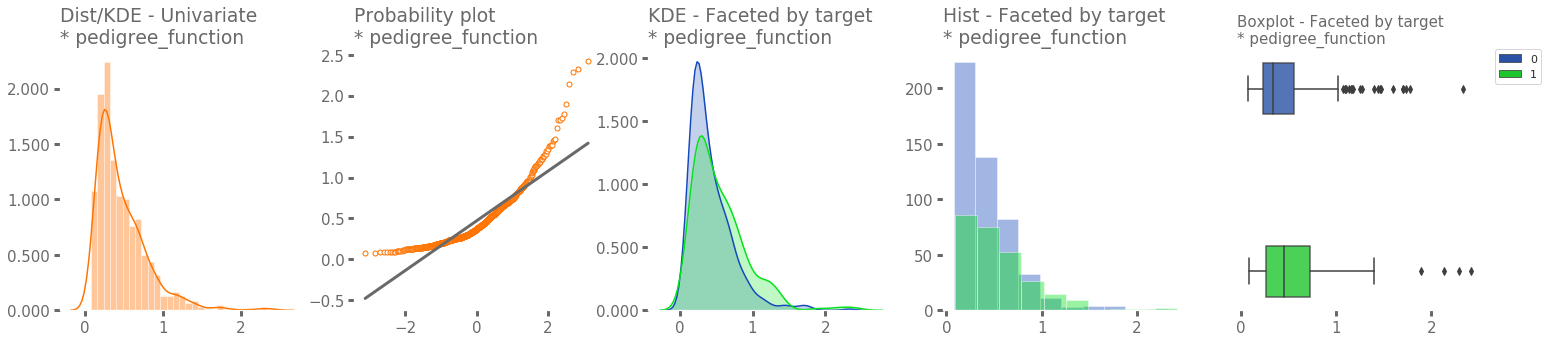

Univariate stats Bivariate stats Statistical test 
 
 
 
 age 
 
 
 
 
 count 
 768.000000 
 
 
 mean 
 33.240885 
 
 
 std 
 11.760232 
 
 
 min 
 21.000000 
 
 
 25% 
 24.000000 
 
 
 50% 
 29.000000 
 
 
 75% 
 41.000000 
 
 
 max 
 81.000000 
 
 
 skew 
 1.127390 
 
 
 kurtosis 
 0.631177 
 
 
 
 
 
 age 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 0.000000 
 500.000000 
 65.104167 
 31.190000 
 11.655981 
 
 
 1.000000 
 268.000000 
 34.895833 
 37.067164 
 10.947771 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 6.792700 
 0.000000

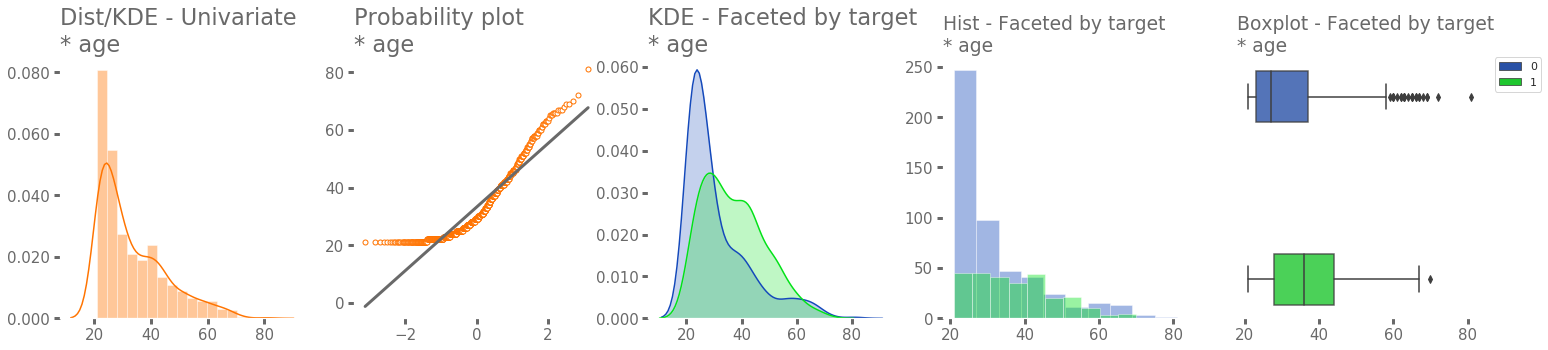

In [4]:
# preliminary EDA using MLMachine
# sns.set_style("whitegrid")
train = mlm.Machine(data=df, target=["onset_diabetes"], target_type="object")
# m.transformLabel()
train.eda_cat_target_num_feat()

> Remarks - Notice that several features have 0 as a minimum value where a value of 0 is impossible. For example, a BMI of 0 is impossible. However, a times_pregnant value of 0 is certainly possible. So it appears that 0 is being using to indicate missing values for a few of the columns, namely bmi, plasma_glucose_concentration, diastrolic_blood_pressure, triceps_thickness and serum_insulin.

## Correlation

<a id = 'Correlation'></a>

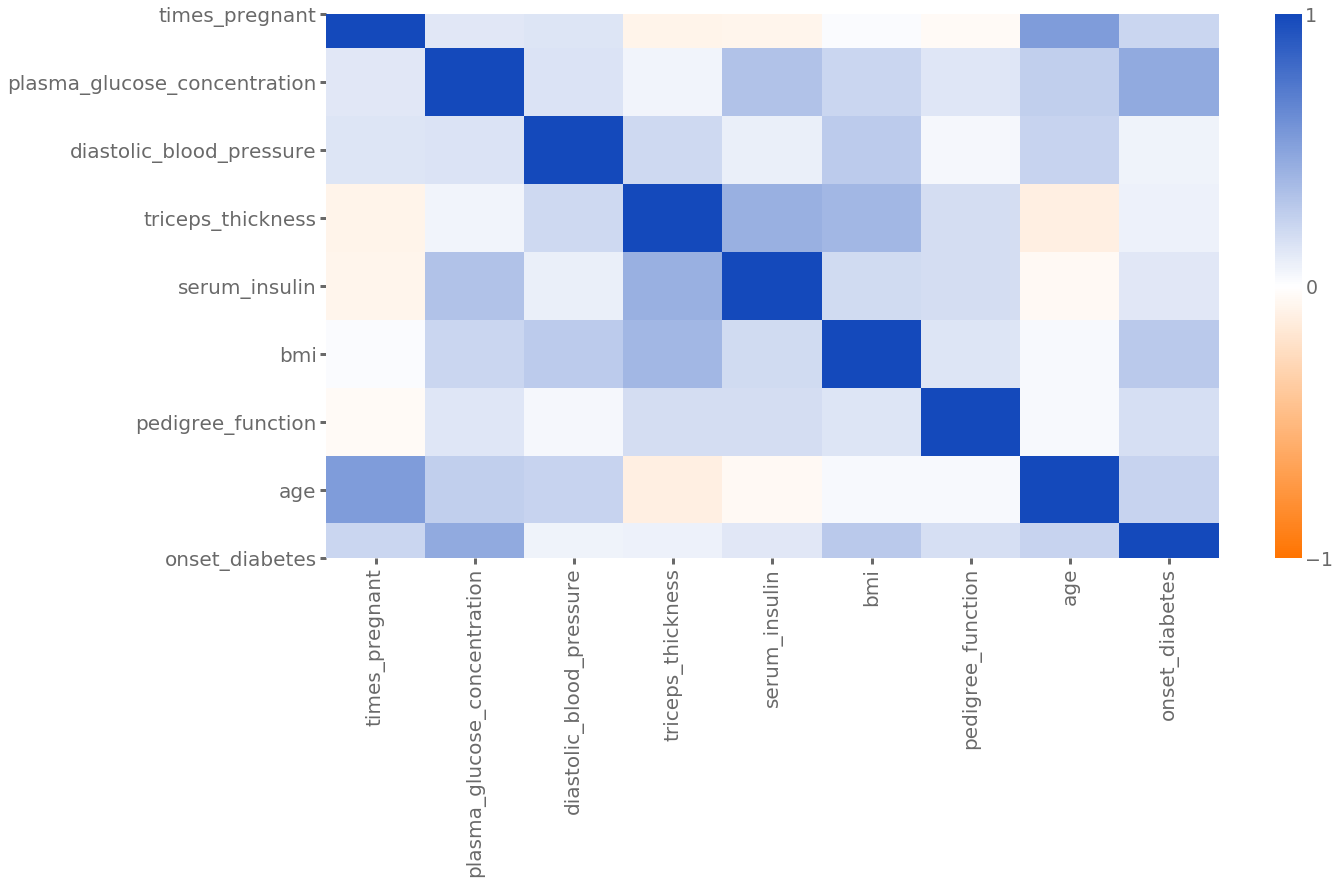

In [12]:
# correlation heat map
p = PrettierPlot(chart_prop=20)
ax = p.make_canvas()
p.corr_heatmap(df=train.recombine_data(train.data, train.target), ax=ax)

In [13]:
# display correlation coefficients for target
df.corr()["onset_diabetes"]

times_pregnant                 0.221898
plasma_glucose_concentration   0.466581
diastolic_blood_pressure       0.065068
triceps_thickness              0.074752
serum_insulin                  0.130548
bmi                            0.292695
pedigree_function              0.173844
age                            0.238356
onset_diabetes                 1.000000
Name: onset_diabetes, dtype: float64

## Missing data

<a id = 'Missing-data'></a>

In [14]:
# count missing values
df.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [15]:
# calculate summary statistics
df.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Remarks - Several features, such as 'BMI' and 'diastolic_blood_pressure' have a minimum value of zero where such a value would be impossible. This leads us to believe '0' is being used to indicate missing values in several of the columns

In [16]:
# replace nulls with none
columns = [
    "serum_insulin",
    "bmi",
    "plasma_glucose_concentration",
    "diastolic_blood_pressure",
    "triceps_thickness",
]
for col in columns:
    df[col].replace([0], [None], inplace=True)

In [17]:
# count missing values
df.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

### Remove missing data

<a id = 'Remove-missing-data'></a>

__Drop all row with NA__

In [18]:
# drop all rows that have a missing value
df_dropped = df.dropna()

num_rows_lost = (df.shape[0] - df_dropped.shape[0]) / df.shape[0]
print("Proportion of data lost: {0}".format(np.round(num_rows_lost, 4)))

Proportion of data lost: 0.4896


__Evaluate impact on features__

In [19]:
# category distribution prior to dropping records
df["onset_diabetes"].value_counts(normalize=True)

0   0.651042
1   0.348958
Name: onset_diabetes, dtype: float64

In [20]:
# category distribution after dropping records
df_dropped["onset_diabetes"].value_counts(normalize=True)

0   0.668367
1   0.331633
Name: onset_diabetes, dtype: float64

In [21]:
# display average value in each column prior to dropping records
df.mean()

times_pregnant                   3.845052
plasma_glucose_concentration   121.686763
diastolic_blood_pressure        72.405184
triceps_thickness               29.153420
serum_insulin                  155.548223
bmi                             32.457464
pedigree_function                0.471876
age                             33.240885
onset_diabetes                   0.348958
dtype: float64

In [22]:
# display average value ine each column after dropping records

df_dropped.mean()

times_pregnant                   3.301020
plasma_glucose_concentration   122.627551
diastolic_blood_pressure        70.663265
triceps_thickness               29.145408
serum_insulin                  156.056122
bmi                             33.086224
pedigree_function                0.523046
age                             30.864796
onset_diabetes                   0.331633
dtype: float64

In [23]:
# prior change in means
(df_dropped.mean() - df.mean()) / df.mean()

times_pregnant                 -0.141489
plasma_glucose_concentration    0.007731
diastolic_blood_pressure       -0.024058
triceps_thickness              -0.000275
serum_insulin                   0.003265
bmi                             0.019372
pedigree_function               0.108439
age                            -0.071481
onset_diabetes                 -0.049650
dtype: float64

> Remarks - 'times_pregnant' fell by 14%, while 'pedigree_function' increased by 10%. These are pretty substantial changes to the shape of the data, which justifies the need to retain as much data as possible.

### Impute missing data

<a id = 'Impute-missing-data'></a>

In [24]:
# identify rows that have missing values
empty_plasma_index = df[df["plasma_glucose_concentration"].isnull()].index
df.loc[empty_plasma_index]["plasma_glucose_concentration"]

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

__Impute with mean__

In [25]:
# impute missing values with column average
df["plasma_glucose_concentration"].fillna(
    df["plasma_glucose_concentration"].mean(), inplace=True
)
df.loc[empty_plasma_index]["plasma_glucose_concentration"]

75    121.686763
182   121.686763
342   121.686763
349   121.686763
502   121.686763
Name: plasma_glucose_concentration, dtype: float64

In [26]:
# use sklearn to impute
imputer = preprocessing.Imputer(strategy="mean")
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=pima_column_names)
df_imputed[:5]

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.000000,148.000000,72.000000,35.000000,155.548223,33.600000,0.627000,50.000000,1.000000
1,1.000000,85.000000,66.000000,29.000000,155.548223,26.600000,0.351000,31.000000,0.000000
2,8.000000,183.000000,64.000000,29.153420,155.548223,23.300000,0.672000,32.000000,1.000000
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0.000000
4,0.000000,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33.000000,1.000000


In [27]:
# identify records with missing values
df_imputed.loc[empty_plasma_index]["plasma_glucose_concentration"]

75    121.686763
182   121.686763
342   121.686763
349   121.686763
502   121.686763
Name: plasma_glucose_concentration, dtype: float64

In [28]:
# count number of missing values by columns
df_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

## Pipelines - imputing and feature scaling 

<a id = 'Pipelines-imputing-and-feature-scaling'></a>

__Standard scaling and Max/Min scaling__

In [29]:
#  StandardScaler
knn_params = {
    "imputer__strategy": ["mean", "median"],
    "classify__n_neighbors": [1, 2, 3, 4, 5, 6, 7],
}

mean_impute_standardize = pipeline.Pipeline(
    [
        ("imputer", impute.SimpleImputer()),
        ("standardize", preprocessing.StandardScaler()),
        ("classify", neighbors.KNeighborsClassifier()),
    ]
)
X = df.drop("onset_diabetes", axis=1)
y = df["onset_diabetes"]

grid = model_selection.GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7421875 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


In [30]:
# MinMaxScaler
knn_params = {
    "imputer__strategy": ["mean", "median"],
    "classify__n_neighbors": [1, 2, 3, 4, 5, 6, 7],
}

mean_impute_standardize = pipeline.Pipeline(
    [
        ("imputer", impute.SimpleImputer()),
        ("standardize", preprocessing.MinMaxScaler()),
        ("classify", neighbors.KNeighborsClassifier()),
    ]
)
X = df.drop("onset_diabetes", axis=1)
y = df["onset_diabetes"]

grid = model_selection.GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.74609375 {'classify__n_neighbors': 4, 'imputer__strategy': 'mean'}


__Row normalization__

Makes every row (vector) have the same norm, or length. For example, the L2 norm for rows in the pima dataset is calculated as:

$$
\lVert{x}\lVert = \sqrt{(x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2 + x_6^2 + x_7^2 + x_8^2)}
$$

because there are 8 features, not including the target. This is espeically useful when working with text data or clustering algorithms.

In [31]:
# compute average nomr
np.sqrt((df ** 2).sum(axis=1)).mean()

189.57245272921486

In [32]:
# normalize rows
normalize = preprocessing.Normalizer()

dfN_norm = pd.DataFrame(normalize.fit_transform(df_imputed), columns=pima_column_names)
np.sqrt((dfN_norm ** 2).sum(axis=1)).mean()

1.0

In [33]:
# row normalization
knn_params = {
    "imputer__strategy": ["mean", "median"],
    "classify__n_neighbors": [1, 2, 3, 4, 5, 6, 7],
}

mean_impute_standardize = pipeline.Pipeline(
    [
        ("imputer", impute.SimpleImputer()),
        ("normalize", preprocessing.Normalizer()),
        ("classify", neighbors.KNeighborsClassifier()),
    ]
)
X = df.drop("onset_diabetes", axis=1)
y = df["onset_diabetes"]

grid = model_selection.GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.6822916666666666 {'classify__n_neighbors': 6, 'imputer__strategy': 'mean'}
